In [10]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\sagar\Downloads\Cognifyz Internship\Dataset .csv"
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(data.head())

# Task 1: Determine the top three most common cuisines
top_cuisines = data['Cuisines'].value_counts().head(3)
print("Top 3 Cuisines:\n", top_cuisines)

# Calculate the percentage of restaurants that serve each of the top cuisines
total_restaurants = data['Cuisines'].count()
percentages = (top_cuisines / total_restaurants) * 100
print("Percentage of Restaurants Serving Top 3 Cuisines:\n", percentages)


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [9]:
 # Task 2: City Analysis

# Identify the city with the highest number of restaurants
top_city = data['City'].value_counts().idxmax()
top_city_count = data['City'].value_counts().max()
print(f"The city with the highest number of restaurants is {top_city} with {top_city_count} restaurants.")

# Calculate the average rating for restaurants in each city
average_ratings_by_city = data.groupby('City')['Aggregate rating'].mean()
print("\nAverage ratings for restaurants in each city:\n", average_ratings_by_city)

# Determine the city with the highest average rating
highest_avg_rating_city = average_ratings_by_city.idxmax()
highest_avg_rating = average_ratings_by_city.max()
print(f"\nThe city with the highest average rating is {highest_avg_rating_city} with an average rating of {highest_avg_rating:.2f}.")




The city with the highest number of restaurants is New Delhi with 5473 restaurants.

Average ratings for restaurants in each city:
 City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

The city with the highest average rating is Inner City with an average rating of 4.90.


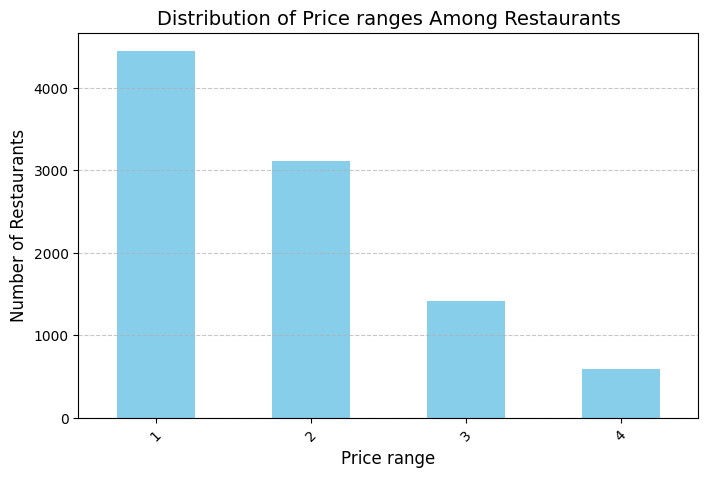

Percentage of Restaurants in Each Price Range Category:
 Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


In [12]:
import matplotlib.pyplot as plt

# Task 3: Price Range Distribution

# Ensure the column name matches your dataset
price_range_column = 'Price range'  # Replace with the exact column name if needed

# Count the number of restaurants in each price range category
price_range_counts = data[price_range_column].value_counts()

# Visualize the distribution of price ranges using a bar chart
plt.figure(figsize=(8, 5))
price_range_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Price ranges Among Restaurants', fontsize=14)
plt.xlabel('Price range', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate the percentage of restaurants in each price range category
total_restaurants = len(data)
price_range_percentages = (price_range_counts / total_restaurants) * 100
print("Percentage of Restaurants in Each Price Range Category:\n", price_range_percentages)


In [14]:
 # Task 4: Online Delivery Analysis

# Column names
online_delivery_column = 'Has Online delivery'
rating_column = 'Aggregate rating'

# Determine the percentage of restaurants that offer online delivery
online_delivery_counts = data[online_delivery_column].value_counts()
online_delivery_percentages = (online_delivery_counts / len(data)) * 100
print("Percentage of Restaurants Offering Online Delivery:\n", online_delivery_percentages)

# Compare the average ratings of restaurants with and without online delivery
average_ratings_online_delivery = data.groupby(online_delivery_column)[rating_column].mean()
print("\nAverage Ratings Based on Online Delivery Availability:\n", average_ratings_online_delivery)



Percentage of Restaurants Offering Online Delivery:
 Has Online delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64

Average Ratings Based on Online Delivery Availability:
 Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


In [15]:
import pandas as pd
from itertools import combinations
from collections import Counter

# Load the dataset
file_path = r"C:\Users\sagar\Downloads\Cognifyz Internship\Dataset .csv"
data = pd.read_csv(file_path)

# Cleaning and preparing the 'Cuisines' column
data['Cuisines'] = data['Cuisines'].fillna('Unknown')  # Handle missing values
data['Cuisines'] = data['Cuisines'].str.split(', ')  # Split cuisines into lists

# Find all unique cuisine combinations
cuisine_combinations = []
for cuisines in data['Cuisines']:
    if len(cuisines) > 1:
        cuisine_combinations.extend(combinations(cuisines, 2))

# Count the most common combinations
combination_counts = Counter(cuisine_combinations)
most_common_combinations = combination_counts.most_common(10)

# Print the top combinations
print("Top 10 Most Common Cuisine Combinations:")
for combo, count in most_common_combinations:
    print(f"{combo}: {count}")

# Analyze ratings for these combinations
combination_ratings = {}
for combo in most_common_combinations:
    cuisine1, cuisine2 = combo[0]
    mask = data['Cuisines'].apply(lambda x: cuisine1 in x and cuisine2 in x)
    avg_rating = data[mask]['Aggregate rating'].mean()
    combination_ratings[(cuisine1, cuisine2)] = avg_rating

# Print the ratings for the top combinations
print("\nRatings for Top Cuisine Combinations:")
for combo, rating in combination_ratings.items():
    print(f"{combo}: Average Rating = {rating:.2f}")


Top 10 Most Common Cuisine Combinations:
('North Indian', 'Chinese'): 1516
('North Indian', 'Mughlai'): 728
('North Indian', 'Fast Food'): 377
('Chinese', 'Fast Food'): 331
('North Indian', 'South Indian'): 314
('North Indian', 'Continental'): 288
('Chinese', 'North Indian'): 268
('Bakery', 'Desserts'): 263
('Mughlai', 'Chinese'): 258
('South Indian', 'Chinese'): 239

Ratings for Top Cuisine Combinations:
('North Indian', 'Chinese'): Average Rating = 2.70
('North Indian', 'Mughlai'): Average Rating = 2.77
('North Indian', 'Fast Food'): Average Rating = 2.70
('Chinese', 'Fast Food'): Average Rating = 2.58
('North Indian', 'South Indian'): Average Rating = 2.55
('North Indian', 'Continental'): Average Rating = 3.41
('Chinese', 'North Indian'): Average Rating = 2.70
('Bakery', 'Desserts'): Average Rating = 2.76
('Mughlai', 'Chinese'): Average Rating = 2.70
('South Indian', 'Chinese'): Average Rating = 2.48


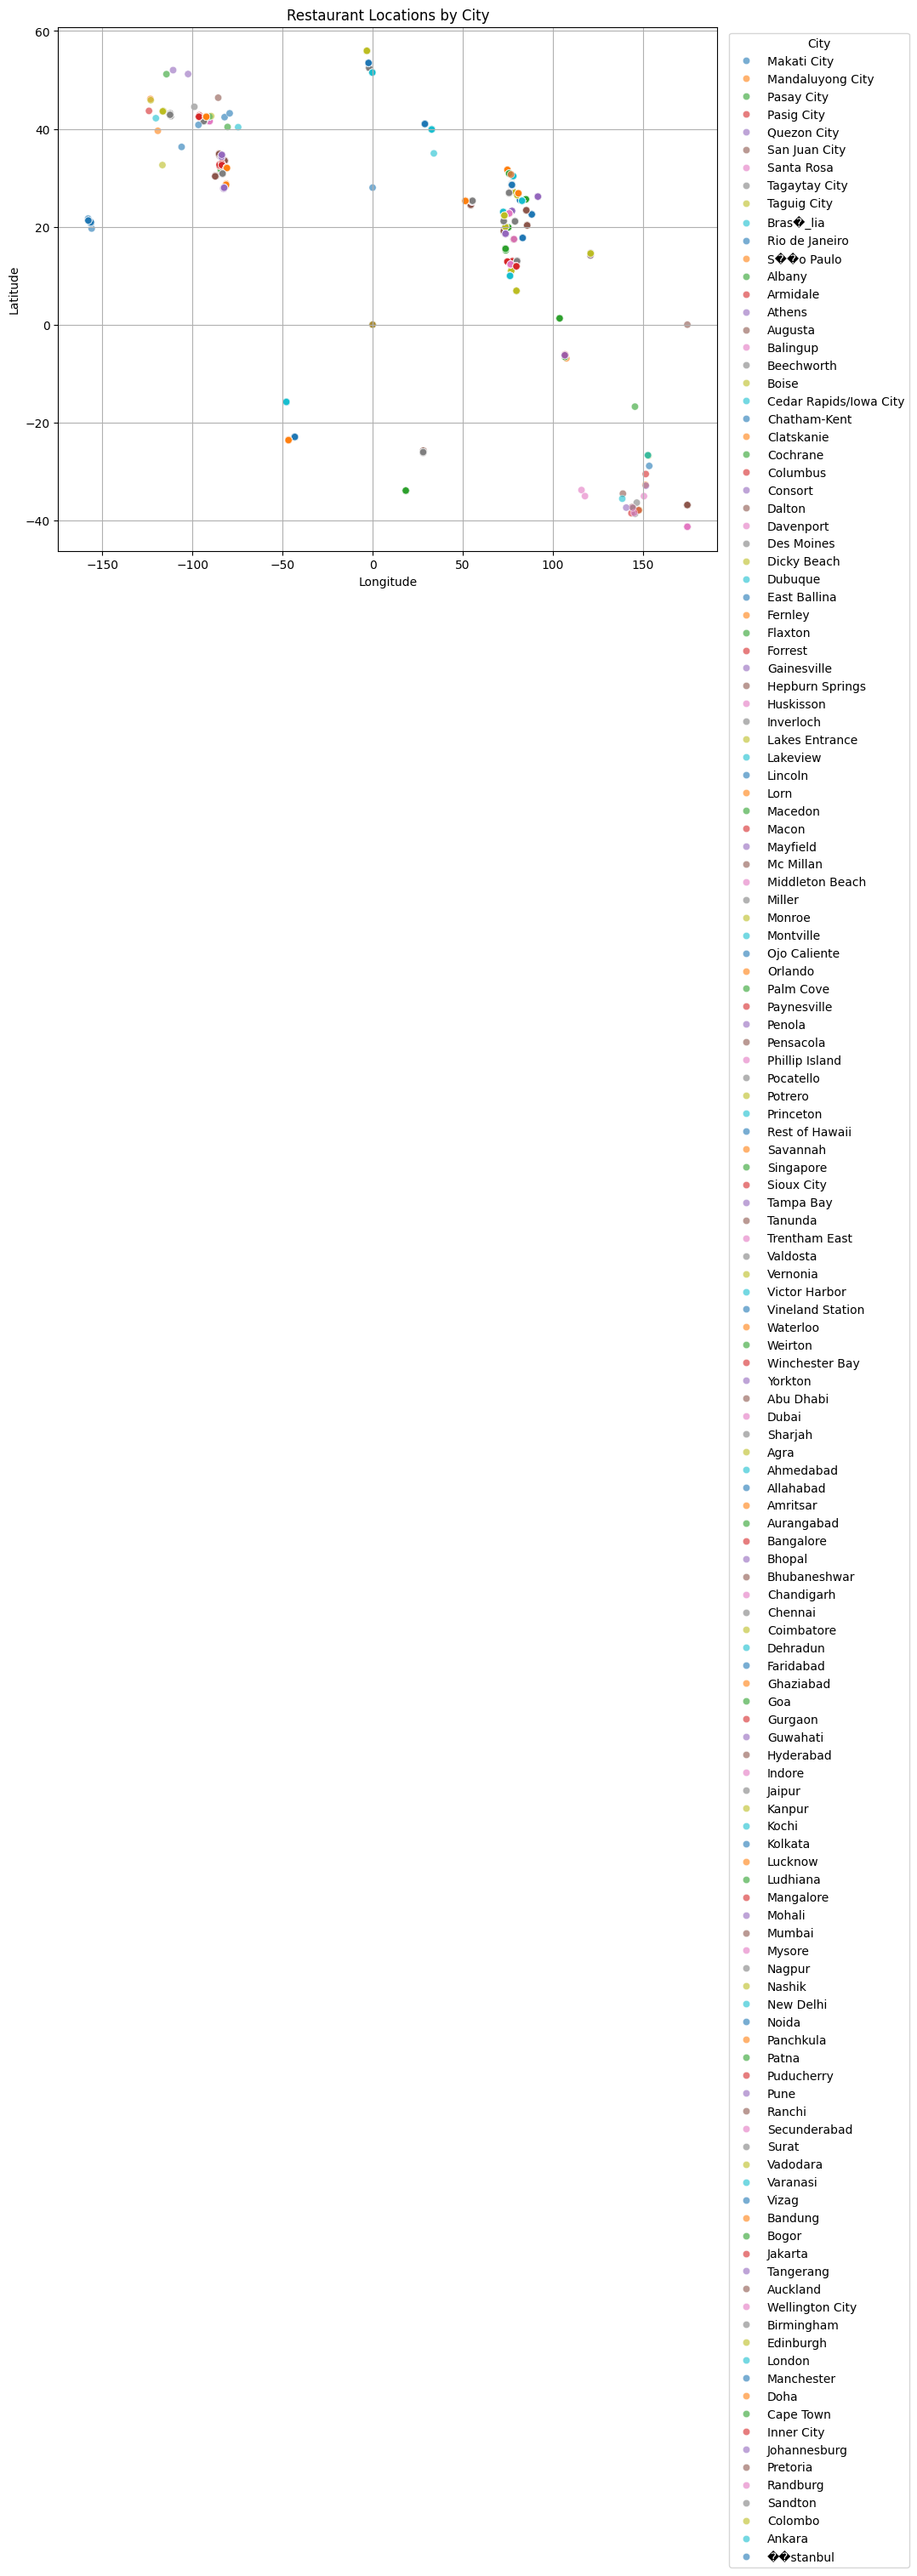

Interactive map saved as 'restaurant_map.html'


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

# Load the dataset
file_path = r"C:\Users\sagar\Downloads\Cognifyz Internship\Dataset .csv"
data = pd.read_csv(file_path)

# Filter data for valid geographic coordinates
data = data[(data['Longitude'].notnull()) & (data['Latitude'].notnull())]

# Create a scatter plot of restaurant locations
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=data['Longitude'], 
    y=data['Latitude'], 
    hue=data['City'], 
    palette='tab10', 
    alpha=0.6
)
plt.title('Restaurant Locations by City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='City', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

# Plot on an interactive map
# Calculate the center of the map
center_lat = data['Latitude'].mean()
center_lon = data['Longitude'].mean()

# Initialize the map
map_restaurants = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Add a marker cluster
marker_cluster = MarkerCluster().add_to(map_restaurants)

# Add markers to the map
for _, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Restaurant: {row['Restaurant Name']}<br>City: {row['City']}<br>Rating: {row['Aggregate rating']}"
    ).add_to(marker_cluster)

# Save and display the map
map_restaurants.save("restaurant_map.html")
print("Interactive map saved as 'restaurant_map.html'")


Top 10 Restaurant Chains:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64

Analysis of Top 10 Chains:
                  Average Rating  Total Votes  Number of Outlets
Restaurant Name                                                 
Cafe Coffee Day         2.419277         2428                 83
Domino's Pizza          2.740506         6643                 79
Subway                  2.907937         6124                 63
Green Chick Chop        2.672549          964                 51
McDonald's              3.339583         5291                 48
Keventers               2.870588         1263                 34
Pizza Hut               3.320000         4961                 30
Giani                   2.689655          854                 29
Baskin Robbins          

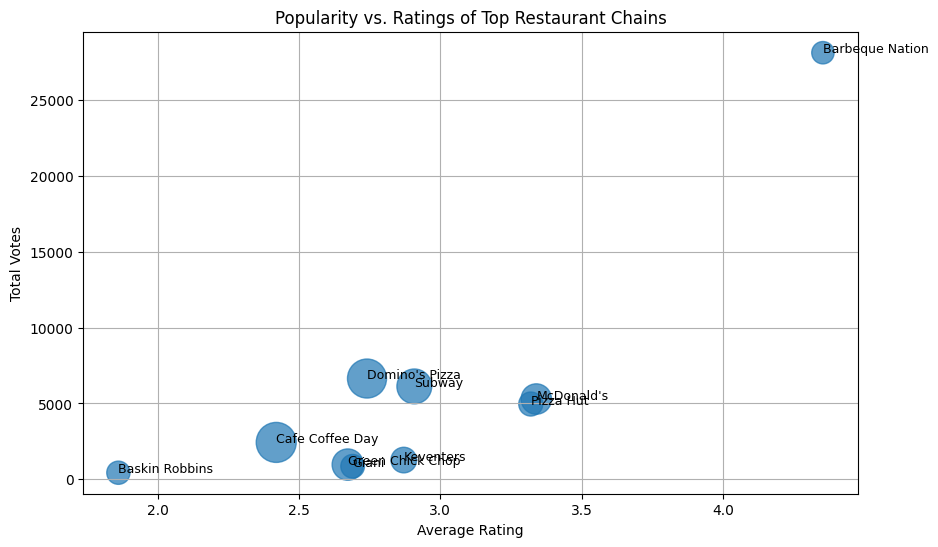

In [18]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\sagar\Downloads\Cognifyz Internship\Dataset .csv"
data = pd.read_csv(file_path)

# Identify restaurant chains (restaurants with the same name appearing in multiple locations)
restaurant_counts = data['Restaurant Name'].value_counts()
chains = restaurant_counts[restaurant_counts > 1]  # Filter restaurants appearing more than once

# Display the top 10 restaurant chains by number of outlets
print("Top 10 Restaurant Chains:")
print(chains.head(10))

# Analyze ratings and votes for the chains
chain_data = data[data['Restaurant Name'].isin(chains.index)]

# Calculate average rating and total votes for each chain
chain_analysis = chain_data.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'Restaurant ID': 'count'
}).rename(columns={
    'Aggregate rating': 'Average Rating',
    'Votes': 'Total Votes',
    'Restaurant ID': 'Number of Outlets'
}).sort_values(by='Number of Outlets', ascending=False)

# Display top 10 chains by number of outlets
print("\nAnalysis of Top 10 Chains:")
print(chain_analysis.head(10))

# Plot the popularity (votes) vs. average rating for the top chains
import matplotlib.pyplot as plt

top_chains = chain_analysis.head(10)
plt.figure(figsize=(10, 6))
plt.scatter(top_chains['Average Rating'], top_chains['Total Votes'], s=top_chains['Number of Outlets'] * 10, alpha=0.7)
for i, name in enumerate(top_chains.index):
    plt.text(top_chains['Average Rating'].iloc[i], top_chains['Total Votes'].iloc[i], name, fontsize=9)
plt.title("Popularity vs. Ratings of Top Restaurant Chains")
plt.xlabel("Average Rating")
plt.ylabel("Total Votes")
plt.grid(True)
plt.show()


Average Rating Text Length: 7.02 characters


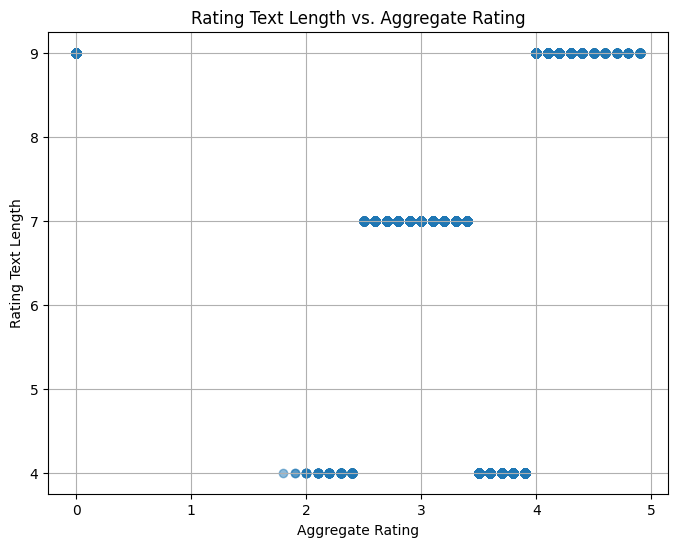


Top 10 Common Keywords in Rating Texts:
average      3737
good         3179
rated        2148
excellent     301
poor          186
dtype: int64


In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Load dataset
file_path = r"C:\Users\sagar\Downloads\Cognifyz Internship\Dataset .csv"
data = pd.read_csv(file_path)

# Use 'Rating text' as a substitute for 'Reviews'
data['Rating text'] = data['Rating text'].fillna('')  # Handle missing values

# Calculate average length of 'Rating text'
data['Rating Text Length'] = data['Rating text'].apply(len)
average_text_length = data['Rating Text Length'].mean()
print(f"Average Rating Text Length: {average_text_length:.2f} characters")

# Analyze relationship between text length and aggregate rating
plt.figure(figsize=(8, 6))
plt.scatter(data['Aggregate rating'], data['Rating Text Length'], alpha=0.5)
plt.title("Rating Text Length vs. Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Rating Text Length")
plt.grid(True)
plt.show()

# Extract most common keywords from 'Rating text'
vectorizer = CountVectorizer(stop_words='english')
word_matrix = vectorizer.fit_transform(data['Rating text'])
word_freq = pd.DataFrame(
    word_matrix.toarray(), 
    columns=vectorizer.get_feature_names_out()
).sum().sort_values(ascending=False)

# Top 10 common words
print("\nTop 10 Common Keywords in Rating Texts:")
print(word_freq.head(10))


Restaurant with Highest Votes:
Restaurant Name      Toit
Votes               10934
Aggregate rating      4.8
Name: 728, dtype: object

Restaurant with Lowest Votes:
Restaurant Name     Cantinho da Gula
Votes                              0
Aggregate rating                 0.0
Name: 69, dtype: object

Correlation between Votes and Ratings: 0.31


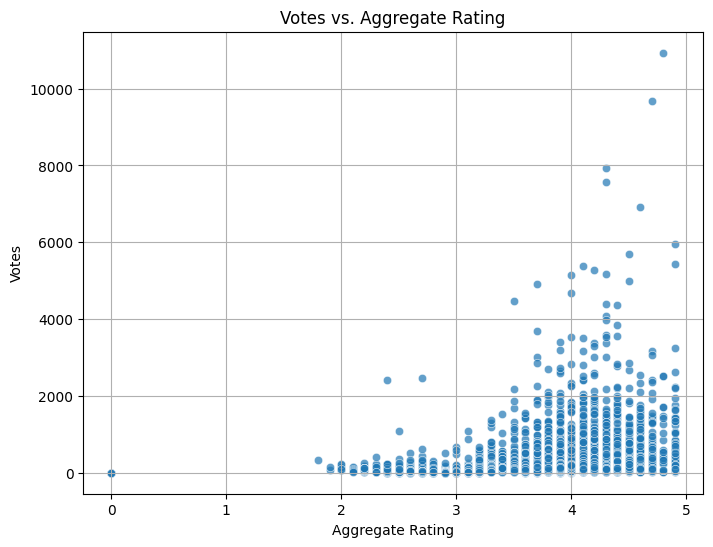

In [23]:
import seaborn as sns

# Restaurants with the highest and lowest votes
highest_votes = data.loc[data['Votes'].idxmax()]
lowest_votes = data.loc[data['Votes'].idxmin()]

print(f"Restaurant with Highest Votes:\n{highest_votes[['Restaurant Name', 'Votes', 'Aggregate rating']]}\n")
print(f"Restaurant with Lowest Votes:\n{lowest_votes[['Restaurant Name', 'Votes', 'Aggregate rating']]}\n")

# Correlation between votes and ratings
correlation = data['Votes'].corr(data['Aggregate rating'])
print(f"Correlation between Votes and Ratings: {correlation:.2f}")

# Visualize votes vs. ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Aggregate rating'], y=data['Votes'], alpha=0.7)
plt.title("Votes vs. Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Votes")
plt.grid(True)
plt.show()


Price Range vs. Availability of Online Delivery and Table Booking:
   Price range  Online Delivery (%)  Table Booking (%)
0            1            15.774077           0.022502
1            2            41.310633           7.677482
2            3            29.190341          45.738636
3            4             9.044369          46.757679


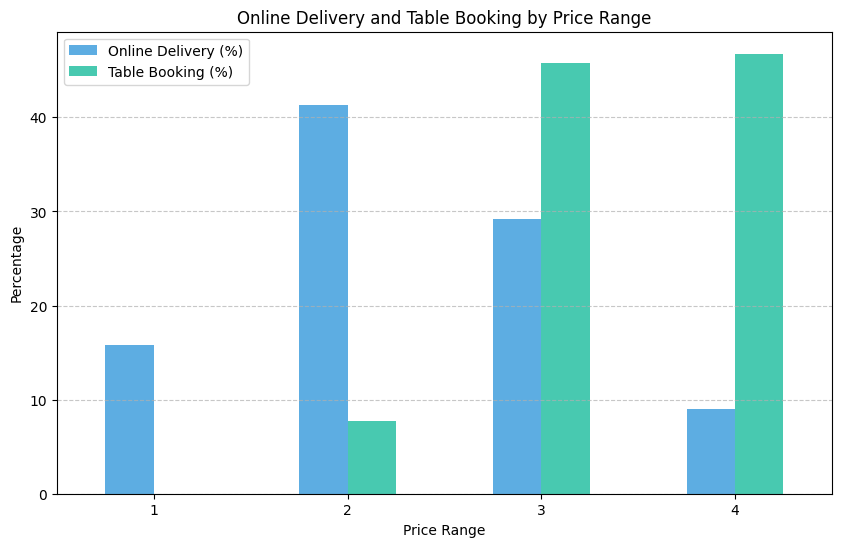

In [24]:
import numpy as np

# Availability of online delivery and table booking by price range
price_range_analysis = data.groupby('Price range').agg({
    'Has Online delivery': lambda x: (x == 'Yes').mean() * 100,
    'Has Table booking': lambda x: (x == 'Yes').mean() * 100
}).rename(columns={
    'Has Online delivery': 'Online Delivery (%)',
    'Has Table booking': 'Table Booking (%)'
}).reset_index()

print("Price Range vs. Availability of Online Delivery and Table Booking:")
print(price_range_analysis)

# Visualize the relationship
price_range_analysis.set_index('Price range').plot(
    kind='bar', figsize=(10, 6), color=['#5DADE2', '#48C9B0']
)
plt.title("Online Delivery and Table Booking by Price Range")
plt.ylabel("Percentage")
plt.xlabel("Price Range")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()
